In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
len(faces.images)

400

In [4]:
X = faces.data
Y = faces.target

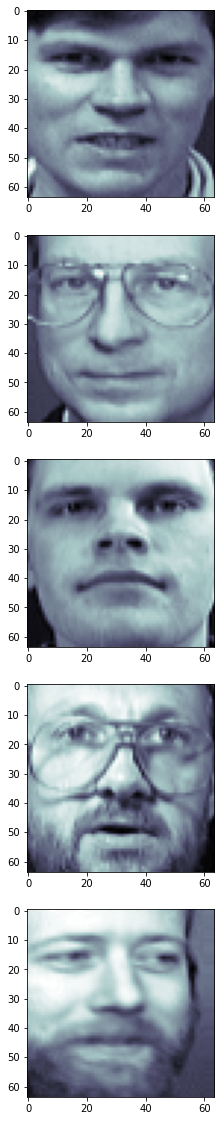

In [5]:
import numpy as np
numbers = np.random.randint(1,400,5)

fig, ax = plt.subplots(5, 1, figsize=(5, 20))

for i in range(len(numbers)):
    ax[i].imshow(faces.images[numbers[i]], cmap=plt.cm.bone)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2)

In [7]:
from sklearn.svm import SVC
model_svc = SVC()

In [8]:
model_svc.fit(x_train, y_train)

SVC()

In [9]:
y_pred = model_svc.predict(x_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9125

In [11]:
metrics.precision_score(y_test, y_pred,  average='macro', zero_division=True)

0.9027777777777778

In [12]:
metrics.recall_score(y_test, y_pred,  average='macro', zero_division=True)

0.9189814814814814

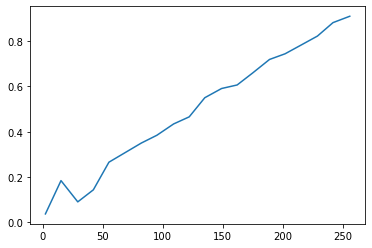

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
plt.plot(train_sizes, np.mean(test_scores, axis=1))

1. Постройте модели классификации на основе следующих методов:
 логистическая регрессия (LogisticRegression);
 метод опорных векторов с гауссовым ядром (SVC);
 метод опорных векторов с полиномиальным ядром (SVC);
 метод k ближайших соседей (KNeighborsClassifier);
 многослойный перцептрон (MLP);
 другие методы по желанию;
2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
3. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.
5. (*) Используйте сверточную нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.

In [14]:
%%time
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=2000)
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95
Wall time: 56.9 s


In [15]:
%%time
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)
y_pred = svc_rbf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9125
Wall time: 941 ms


In [16]:
%%time
svc_rbf = SVC(kernel='poly')
svc_rbf.fit(x_train, y_train)
y_pred = svc_rbf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9375
Wall time: 603 ms


In [17]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.725
Wall time: 70 ms


In [18]:
%%time
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=1000)
mlpc.fit(x_train, y_train)
y_pred = mlpc.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95
Wall time: 25.5 s


In [19]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6
Wall time: 5.34 s


Text(0.5, 1.0, 'DecisionTreeClassifier')

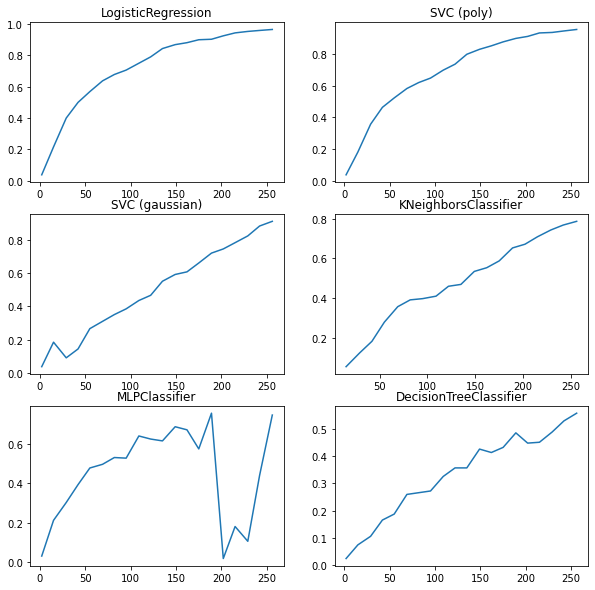

In [20]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(3, 2, figsize=(10,10))
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[0, 0].plot(train_sizes, np.mean(test_scores, axis=1))
ax[0, 0].set_title('LogisticRegression')
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf'), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[1, 0].plot(train_sizes, np.mean(test_scores, axis=1))
ax[1, 0].set_title('SVC (gaussian)')
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='poly'), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[0, 1].plot(train_sizes, np.mean(test_scores, axis=1))
ax[0, 1].set_title('SVC (poly)')
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[1, 1].plot(train_sizes, np.mean(test_scores, axis=1))
ax[1, 1].set_title('KNeighborsClassifier')
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[2, 0].plot(train_sizes, np.mean(test_scores, axis=1))
ax[2, 0].set_title('MLPClassifier')
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), x_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 20))
ax[2, 1].plot(train_sizes, np.mean(test_scores, axis=1))
ax[2, 1].set_title('DecisionTreeClassifier')